Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

### Loading Data and Pre-processing for EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/Shareddrives/BEST Lab   Squishy Robotics URAP Root/URAP + DevEng/1 - Wildfire/Wildfire - Grace, Stella, Ian/all_db_fire.zip (Unzipped Files)/'
original_data = pd.read_csv(data_path + 'bdfire/data.csv', encoding='ISO-8859-1')
original_data.head()

Mounted at /content/drive


Id  "date_photo"  "dossier_media"               "photo"  \
0  2795    "20/06/14"          "00505"   "seq05_rgb_001.png"   
1  2796    "20/06/14"          "00505"   "seq05_rgb_002.png"   
2  2797    "20/06/14"          "00505"   "seq05_rgb_003.png"   
3  2798    "20/06/14"          "00505"   "seq05_rgb_004.png"   
4  2799    "20/06/14"          "00505"   "seq05_rgb_005.png"   

             "photo_IR"     "verite_terrain"      "materiel"  "focale"  \
0   "seq05_nir_001.png"   "seq05_gt_001.png"   "JAI AD-80GE"       "6"   
1   "seq05_nir_002.png"   "seq05_gt_002.png"              ""       "0"   
2   "seq05_nir_003.png"   "seq05_gt_003.png"              ""       "0"   
3   "seq05_nir_004.png"   "seq05_gt_004.png"              ""       "0"   
4   "seq05_nir_005.png"   "seq05_gt_005.png"              ""       "0"   

   "sensibilite"       "spectre_ir"  ...  "luminosite"  \
0            "0"   "NIR: 0.74-1 µm"  ...          "41"   
1            "0"                 ""  ...          "41"   
2            "0"                 ""  ...          "40"   
3            "0"                 ""  ...          "40"   
4            "0"                 ""  ...          "39"   

                    "vegetation"  "moment"  "nuage"  "distance"  \
0   "frisure de bois/crimp wood"        ""      "0"          ""   
1                             ""        ""      "0"          ""   
2                             ""        ""      "0"          ""   
3                             ""        ""      "0"          ""   
4                             ""        ""      "0"          ""   

      "presence"  "valid"          "proprietaire"  "sequence"  "numimage"  
0   "hommes/men"      "1"   "Université de Corse"         "5"         "1"  
1             ""      "1"   "Université de Corse"         "5"         "2"  
2             ""      "1"   "Université de Corse"         "5"         "3"  
3             ""      "1"   "Université de Corse"         "5"         "4"  
4             ""      "1"   "Université de Corse"         "5"         "5"  

[5 rows x 33 columns]

In [4]:
original_data.columns

Index(['Id', ' "date_photo"', ' "dossier_media"', ' "photo"', ' "photo_IR"',
       ' "verite_terrain"', ' "materiel"', ' "focale"', ' "sensibilite"',
       ' "spectre_ir"', ' "tps_expo"', ' "hauteur"', ' "largeur"', ' "heure"',
       ' "lieu"', ' "region"', ' "position_GPS"', ' "direction_feu"',
       ' "taux_occupation"', ' "couleur_dominante"', ' "densite"',
       ' "taux_supperposition"', ' "couleur_fumees"', ' "luminosite"',
       ' "vegetation"', ' "moment"', ' "nuage"', ' "distance"', ' "presence"',
       ' "valid"', ' "proprietaire"', ' "sequence"', ' "numimage"'],
      dtype='object')

In [5]:
# Reformat columns names
original_data.columns = [col.strip().strip('"').strip("'") for col in original_data.columns]

In [6]:
french_columns = original_data.columns.to_list()

english_columns = [
    "ID", "Photo Date", "Media Folder", "Photo", "Infrared", "Ground Truth",
    "Material", "Focal Length", "Sensitivity", "Infrared Spectrum", "Exposure Time",
    "Height", "Width", "Time", "Location", "Region", "GPS Position", "Fire Direction",
    "Occupancy Rate", "Dominant Color", "Density", "Superposition Rate",
    "Smoke Color", "Luminosity", "Vegetation", "Moment", "Cloud",
    "Distance", "Presence", "Valid", "Owner", "Sequence", "Image Number"
]

data = original_data[french_columns]
data.columns = english_columns

In [7]:
def extract_after_slash(text):

    if pd.notnull(text) and "/" in text:
        return text.split("/")[-1]
    elif text == "":
        return None
    return text

def strip_str_field(text):
    text = text.apply(lambda x: x.strip().strip('"').strip("'"))
    text = text.apply(lambda x: np.nan if x == "" else x)
    return text

# extract English words after "/"
for column in ['Fire Direction', 'Dominant Color', 'Smoke Color', 'Vegetation', 'Presence']:
    data[column] = strip_str_field(data[column]).apply(extract_after_slash)

# transform strings to int for quantitative fields
quantitative_fields = [
    "Focal Length", "Sensitivity", "Exposure Time", "Height", "Width",
    "Occupancy Rate", "Density", "Superposition Rate", "Luminosity", "Cloud", "Valid",
    "Sequence", "Image Number"
]
for column in  quantitative_fields:
    data[column] = strip_str_field(data[column]).astype(int)

# strip the quotation mark for photo column
for column in ['Photo', 'Infrared', 'Ground Truth', 'Material','Time', 'Location', 'Distance']:
  data[column] = strip_str_field(data[column])

In [8]:
#data.to_csv("/content/drive/My Drive/modified_corsican_descriptors.csv")

## EDA

### Summary statistics and distributions

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1135 non-null   int64  
 1   Photo Date          1135 non-null   object 
 2   Media Folder        1135 non-null   object 
 3   Photo               1135 non-null   object 
 4   Infrared            635 non-null    object 
 5   Ground Truth        1135 non-null   object 
 6   Material            9 non-null      object 
 7   Focal Length        1135 non-null   int64  
 8   Sensitivity         1135 non-null   int64  
 9   Infrared Spectrum   1135 non-null   object 
 10  Exposure Time       1135 non-null   int64  
 11  Height              1135 non-null   int64  
 12  Width               1135 non-null   int64  
 13  Time                1135 non-null   object 
 14  Location            907 non-null    object 
 15  Region              1135 non-null   object 
 16  GPS Po

We can see that most if not all global descriptors have no null values. However, from the fire and background descriptors, several descriptors such as ***Fire Direction***, ***Smoke Color***, ***Vegetation***, and ***Presence*** (presence of objects that can produce error detections) contain very limited information.

##### Continuous numerical descriptors

In [10]:
# Summary statistics for all numerical descriptors
data.describe()

ID  Focal Length  Sensitivity  Exposure Time       Height  \
count  1135.000000   1135.000000  1135.000000         1135.0  1135.000000   
mean   2379.000000      0.049339     0.550661            0.0   450.767401   
std     327.790584      0.723282    10.669016            0.0   431.338678   
min    1812.000000      0.000000     0.000000            0.0    29.000000   
25%    2095.500000      0.000000     0.000000            0.0   164.500000   
50%    2379.000000      0.000000     0.000000            0.0   291.000000   
75%    2662.500000      0.000000     0.000000            0.0   560.500000   
max    2946.000000     19.000000   320.000000            0.0  2858.000000   

             Width  Occupancy Rate      Density  Superposition Rate  \
count  1135.000000     1135.000000  1135.000000         1135.000000   
mean    710.661674       11.134802     0.372687           45.667841   
std     578.526760       13.065780     0.483733           25.597753   
min      58.000000        0.000000     0.000000            0.000000   
25%     338.000000        3.000000     0.000000           27.000000   
50%     504.000000        5.000000     0.000000           44.000000   
75%     855.000000       15.000000     1.000000           59.500000   
max    3999.000000       79.000000     1.000000          100.000000   

        Luminosity        Cloud  Distance   Valid     Sequence  Image Number  
count  1135.000000  1135.000000       0.0  1135.0  1135.000000    1135.00000  
mean     35.288106     0.000881       NaN     1.0     1.274009      41.12511  
std      13.584304     0.029683       NaN     0.0     1.543543      67.38150  
min       1.000000     0.000000       NaN     1.0     0.000000       0.00000  
25%      21.000000     0.000000       NaN     1.0     0.000000       0.00000  
50%      37.000000     0.000000       NaN     1.0     0.000000       0.00000  
75%      44.000000     0.000000       NaN     1.0     2.000000      54.00000  
max      79.000000     1.000000       NaN     1.0     5.000000     268.00000

Observations:

*   Exposure time, distance, and valid are homogenous columns and provide no discriminatory information. Exposure time should be provided by the owner.
*   ID, height, width, sequence and numimage are metadata about the images themselves. Seq and numimage are probably not as relevant, but height and width might be used in prediction.
*   Density, cloud, and distance are binary columns.


In [11]:
# Discard categorical columns and irrelevant metadata
numerical_data = data.select_dtypes(include=['number']).drop(columns=['ID', 'Exposure Time', 'Density', 'Cloud', 'Distance', 'Valid', 'Sequence', 'Image Number'])

numerical_sparsity = numerical_data.replace(0, pd.NA).isna().sum() / len(numerical_data) * 100
numerical_unique_counts = numerical_data.nunique()

numerical_metrics = pd.DataFrame({
    'Sparsity (%)': numerical_sparsity.round(2),
    'Unique Counts': numerical_unique_counts
})
numerical_metrics.sort_values(by='Sparsity (%)', ascending=False)

Sparsity (%)  Unique Counts
Sensitivity                99.56              5
Focal Length               99.38              5
Superposition Rate          0.97            101
Occupancy Rate              0.53             66
Height                      0.00            606
Width                       0.00            676
Luminosity                  0.00             73

Observations


*   Focal length and sensitivity are <1% available. Focal length and sensitivity are metadata about the image that should be provided by the owner.
*   Height, width, occupancy, superposition, and luminosity are widly available.
*   Occupancy rate and superposition should be investigated further to determine if these can be imputed.




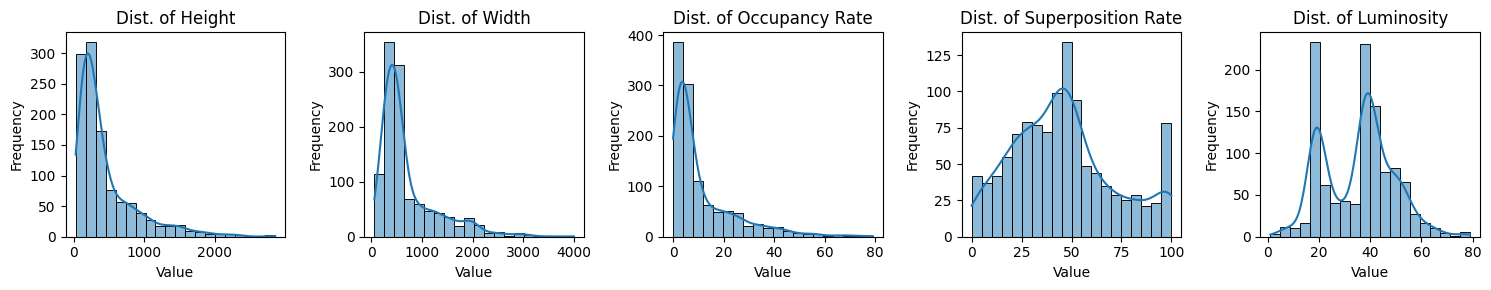

In [12]:
# Create subplots + plot distribution of remaining feature columns with sparse columns and identifiers removed
numerical_data = numerical_data.drop(columns=['Focal Length', 'Sensitivity'])

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_data.columns), figsize=(15, 3))
for i, column in enumerate(numerical_data.columns):
    sns.histplot(numerical_data[column], bins=20, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Dist. of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Categorical descriptors

In [15]:

# Summary statistics for all categorical descriptors
data.describe(include=['object'])

Photo Date Media Folder              Photo           Infrared  \
count          1135         1135               1135                635   
unique           74          600               1135                635   
top      "11/12/12"      "00502"  seq05_rgb_001.png  seq05_nir_001.png   
freq            294          268                  1                  1   

            Ground Truth     Material Infrared Spectrum      Time  \
count               1135            9              1135      1135   
unique              1135            7                 2         5   
top     seq05_gt_001.png  JAI AD-80GE                ""  00:00:00   
freq                   1            2              1133      1131   

                            Location Region GPS Position Fire Direction  \
count                            907   1135         1135              6   
unique                            44      3            3              2   
top     Plateau expérimental - Corte     ""           ""    moves close   
freq                             689   1129         1133              4   

       Dominant Color Smoke Color            Vegetation Moment Presence  \
count            1135           8                     7   1135        8   
unique              4           3                     3      1        2   
top               red        grey  low maquis shrubland     ""       no   
freq              740           6                     4   1135        6   

                         Owner  
count                     1135  
unique                      39  
top      "Université de Corse"  
freq                       635

Observations:

*   Photo date, media folder, photo, infrared, ground truth, time, location, region, and owner are all metadata about the photo.

In [16]:
# Discard irrelevant metadata
categorical_data = data.select_dtypes(include=['object']).drop(columns=['Photo Date', 'Media Folder', 'Photo', 'Infrared', 'Ground Truth', 'Time', 'Location', 'Region', 'Owner'])
additional_columns = ['Distance', 'Cloud', 'Density']
categorical_data = pd.concat([categorical_data, data[additional_columns]], axis=1)

categorical_sparsity = categorical_data.replace([0, 0.0, ' ""'], pd.NA).isna().sum() / len(categorical_data) * 100
categorical_unique_counts = categorical_data.nunique()

categorical_metrics = pd.DataFrame({
    'Sparsity (%)': categorical_sparsity.round(2),
    'Unique Counts': categorical_unique_counts
})

categorical_metrics.sort_values(by='Sparsity (%)', ascending=False)

Sparsity (%)  Unique Counts
Moment                   100.00              1
Distance                 100.00              0
Cloud                     99.91              2
Infrared Spectrum         99.82              2
GPS Position              99.82              3
Fire Direction            99.47              2
Vegetation                99.38              3
Smoke Color               99.30              3
Presence                  99.30              2
Material                  99.21              7
Density                   62.73              2
Dominant Color             0.00              4

Observations:

*   Majority of categorical descriptors are missing.
*   Dominant color is wider available.
*   Material, infrared spectrum, and GPS position are metadata about the camera that should be provided by the owner.
*   Moment, distance, cloud, and density are binary columns that should be investigated to verify quantity of missing data and if these values can be imputed.
*   Fire direction, vegetation, smoke color, and presence require more investigation for whether these values can be imputed as well.



<ipython-input-17-d46bfe3b073e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[col], ax=axes[i], palette='Set2')
<ipython-input-17-d46bfe3b073e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[col], ax=axes[i], palette='Set2')
<ipython-input-17-d46bfe3b073e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[col], ax=axes[i], palette='Set2')
<ipython-input-17-d46bfe3b073e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

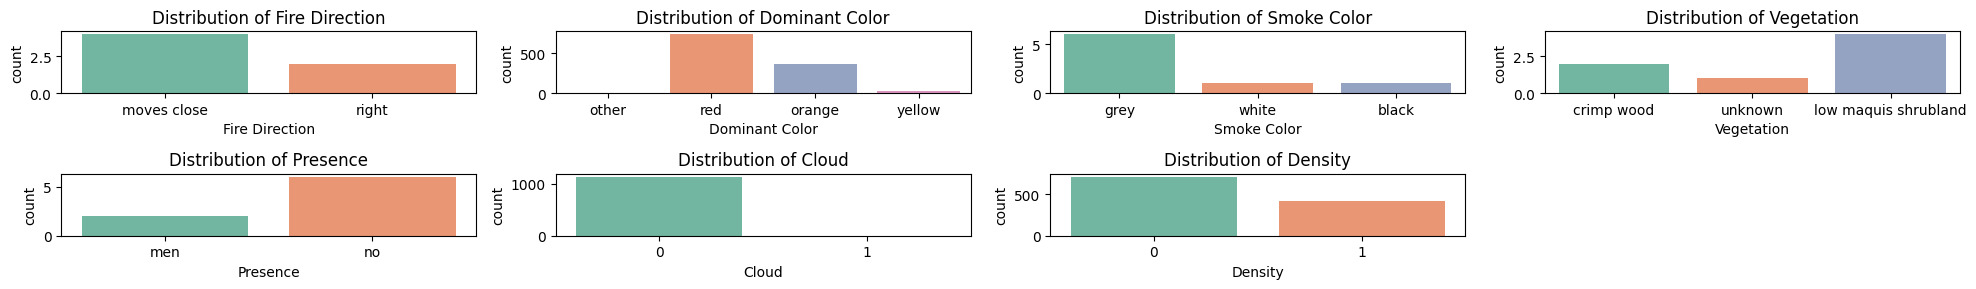

In [17]:
# Drop univalued columns and incomplete metadata
categorical_data = categorical_data.drop(columns=['Moment', 'Distance', 'Infrared Spectrum', 'GPS Position', 'Material'])

fig, axes = plt.subplots(nrows=2, ncols=len(categorical_data.columns)//2 + 1, figsize=(20, 3))
axes = axes.flatten()
for i, col in enumerate(categorical_data.columns):
    sns.countplot(x=categorical_data[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observations:
*   Limited categorical labels are available for the categorical features provided



### Findings:

*   Several image quality and fire descriptors features show a high degree of sparsity.
*   The fire descriptors show low variation and uniformity overall, which may limit and bias the insight that models can derive from the data at this time.

### Correlation Analysis

In [18]:
num_data = data[['Occupancy Rate', 'Superposition Rate','Luminosity']]
corr_matrix = num_data.corr()
print(corr_matrix)

                    Occupancy Rate  Superposition Rate  Luminosity
Occupancy Rate            1.000000            0.028591    0.234427
Superposition Rate        0.028591            1.000000    0.282843
Luminosity                0.234427            0.282843    1.000000


<ipython-input-19-dc9e1ff291f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Dominant Color'], y=numerical_data[column], ax=axes[i], palette='blend:#A52A2A,#FFEC8B')
<ipython-input-19-dc9e1ff291f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Dominant Color'], y=numerical_data[column], ax=axes[i], palette='blend:#A52A2A,#FFEC8B')
<ipython-input-19-dc9e1ff291f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Dominant Color'], y=numerical_data[column], ax=axes[i], palette='blend:#A52A2A,#FFEC8B')
<ipython-inpu

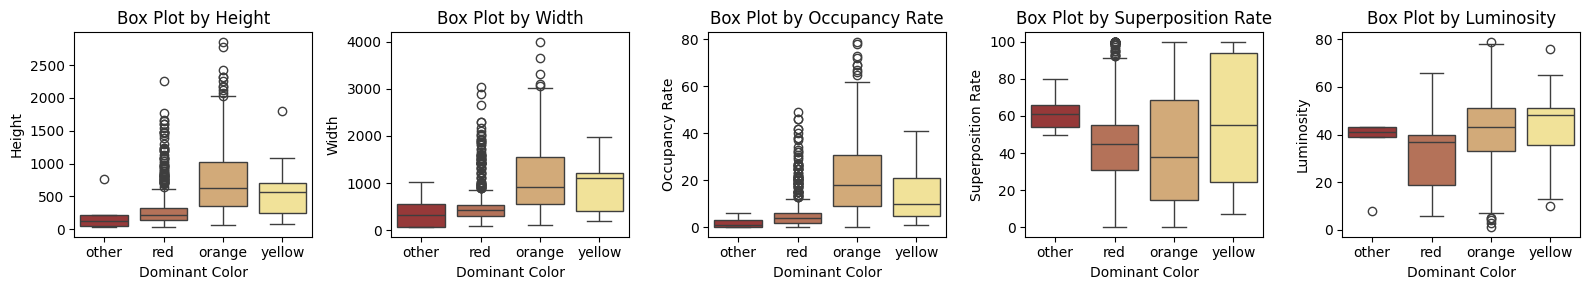

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_data.columns), figsize=(16, 3))
for i, column in enumerate(numerical_data.columns):
    sns.boxplot(x=data['Dominant Color'], y=numerical_data[column], ax=axes[i], palette='blend:#A52A2A,#FFEC8B')
    axes[i].set_title(f'Box Plot by {column}')
    axes[i].set_xlabel('Dominant Color')
    axes[i].set_ylabel(f'{column}')

plt.tight_layout()
plt.show()

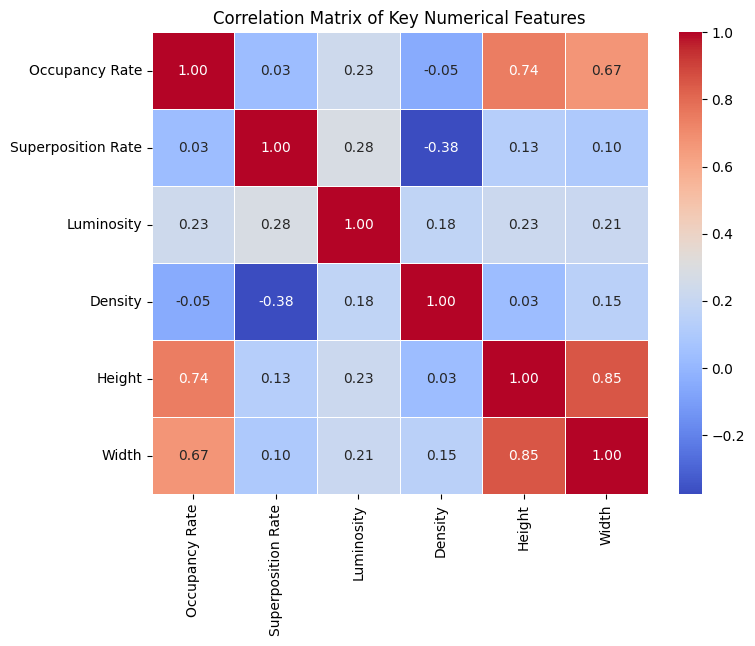

In [20]:
# Compute the correlation matrix for all relevant numerical variables
num_features = ['Occupancy Rate', 'Superposition Rate', 'Luminosity', 'Density', 'Height', 'Width']
corr_matrix = data[num_features].corr()

# Display the correlation matrix with numerical values
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Key Numerical Features")
plt.show()


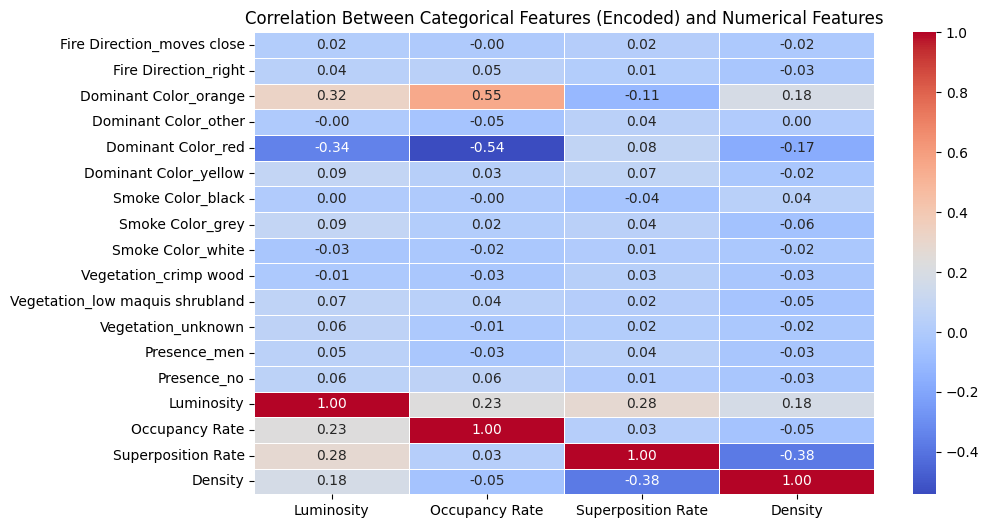

In [21]:
# One-hot encode categorical features
categorical_features = ['Fire Direction', 'Dominant Color', 'Smoke Color', 'Vegetation', 'Presence']
encoded_data = pd.get_dummies(data[categorical_features])

# Select numerical features for correlation
numerical_features = ['Luminosity', 'Occupancy Rate', 'Superposition Rate', 'Density']

# Merge encoded categorical features with numerical data
correlation_data = pd.concat([encoded_data, data[numerical_features]], axis=1)

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Extract only correlations between categorical encodings and numerical variables
selected_columns = encoded_data.columns.tolist() + numerical_features
correlation_subset = correlation_matrix.loc[selected_columns, numerical_features]

# Plot correlation heatmap with numbers
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_subset, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Categorical Features (Encoded) and Numerical Features")
plt.show()


##### Takeaways:
*   Orange fires show a strong positive correlation with occupancy rate. Red fires show a strong negative correlation with occupancy rate.
*   Superposition and density are moderately negatively correlated.

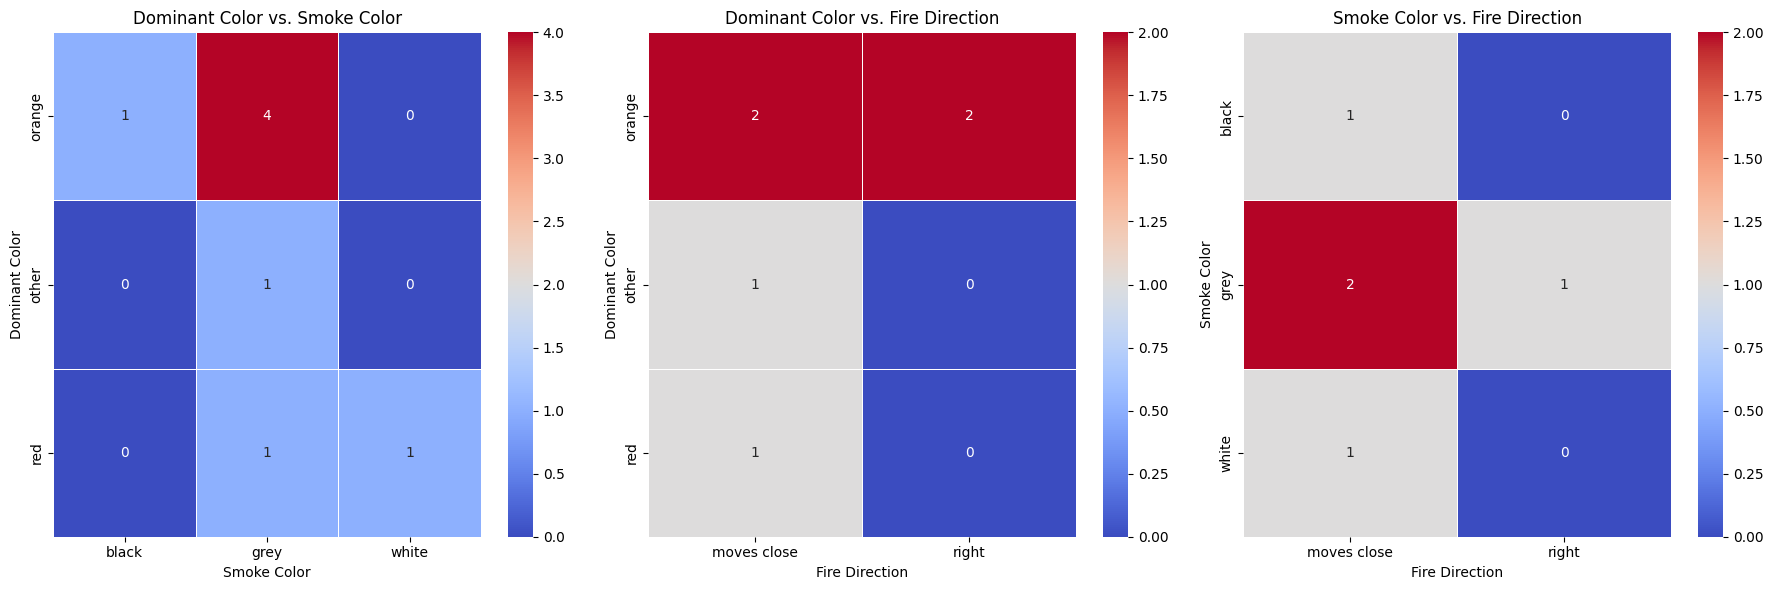

In [22]:
# List of categorical variable pairs to compare
categorical_pairs = [
    ('Dominant Color', 'Smoke Color'),
    ('Dominant Color', 'Fire Direction'),
    ('Smoke Color', 'Fire Direction'),
]

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Generate heatmaps for each categorical pair
for i, (cat1, cat2) in enumerate(categorical_pairs):
    contingency_table = pd.crosstab(data[cat1], data[cat2])
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, ax=axes[i])
    axes[i].set_title(f"{cat1} vs. {cat2}")
    axes[i].set_xlabel(cat2)
    axes[i].set_ylabel(cat1)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Co-occurance counts are represented above

Observations:

*   Data is too sparse to get any generalizable information about the correlation between fire descriptors



### Findings

*   Orange fires show a strong positive correlation with occupancy rate. Red fires show a strong negative correlation with occupancy rate.
*   Superposition and density are moderately negatively correlated.


### Image Sampling

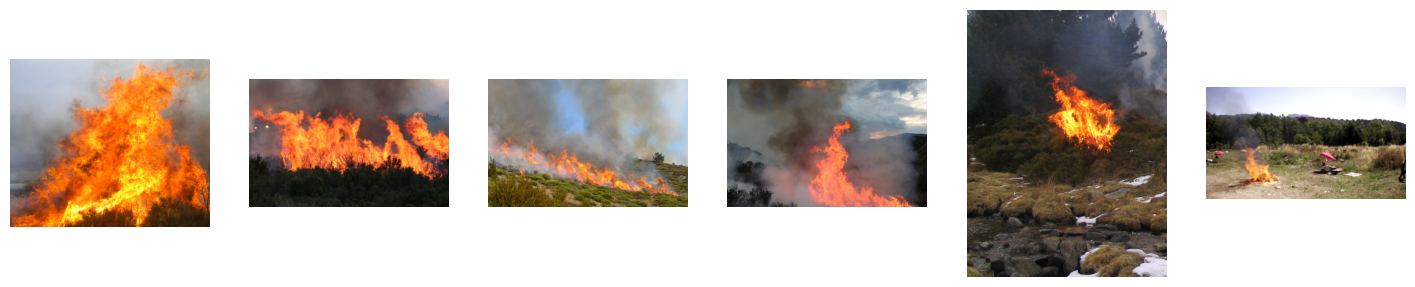

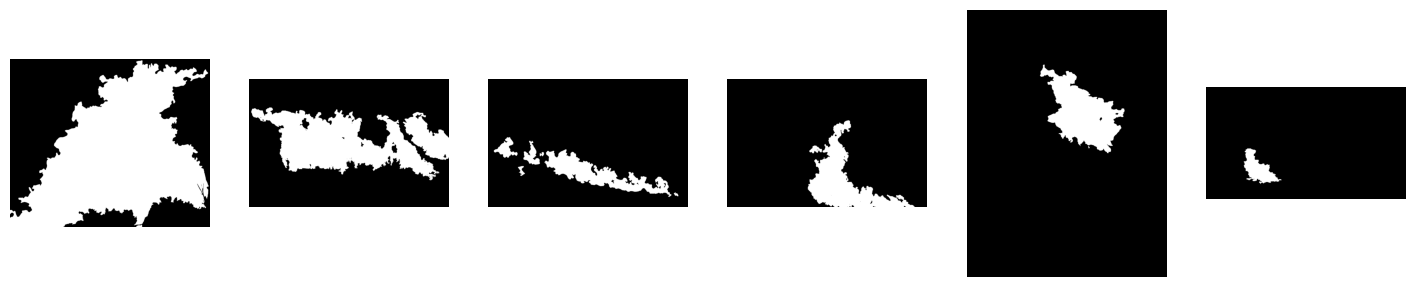

In [23]:
# Function for displaying our samples
def display_images(image_paths):
  fix,axes = plt.subplots(nrows=1, ncols=len(image_paths), figsize=(18, len(image_paths)))

  for ax, img_path in zip(axes, image_paths):
      img = Image.open(data_path + img_path)
      ax.imshow(img)
      ax.axis('off')

  plt.show()

# Sample and display images
sampling_set = data[['Photo', 'Infrared', 'Ground Truth', 'Dominant Color', 'Density', 'Superposition Rate', 'Occupancy Rate', 'Smoke Color', 'Luminosity']]

sample_size = 6
sample_images = sampling_set[sampling_set['Infrared'].isna()].sample(n=sample_size)
display_images(sample_images['Photo'].values)
display_images(sample_images['Ground Truth'].values)

In [24]:
sample_images

Photo Infrared Ground Truth Dominant Color  Density  \
1001  134_rgb.png      NaN   134_gt.png         orange        0   
689   446_rgb.png      NaN   446_gt.png         orange        0   
1054  081_rgb.png      NaN   081_gt.png         orange        0   
685   450_rgb.png      NaN   450_gt.png            red        0   
727   408_rgb.png      NaN   408_gt.png         orange        1   
831   304_rgb.png      NaN   304_gt.png         orange        0   

      Superposition Rate  Occupancy Rate Smoke Color  Luminosity  
1001                  14              54         NaN          55  
689                   14              29         NaN          26  
1054                  71               9         NaN          52  
685                   91              12         NaN          41  
727                   18               6         NaN          26  
831                   71               3         NaN          52

Observations

*   Luminosity visually aligns with overall brightness of the photo.
*   Density as an indicator of fire texture is most prominant for fires with a high degree of variability, containing large sections of yellow, orange, and red flames. Otherwise, distinction across orange fires can be subtle.
*   Superposition and occupancy do not always align with visual observation of smoke coverage over the fire. There may be a degree of error obtained through the processing step.




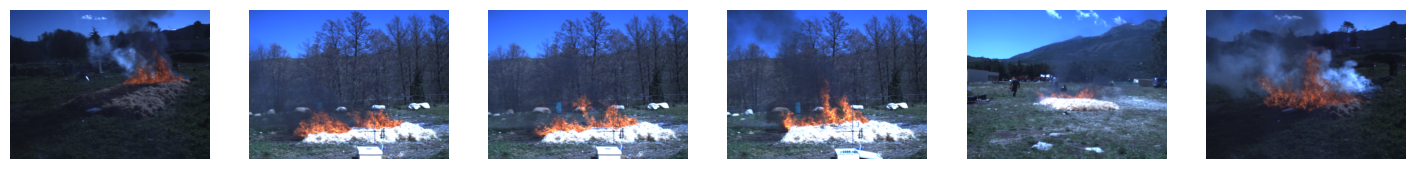

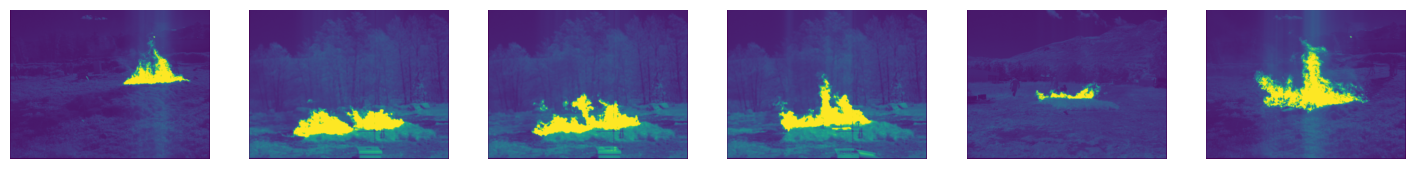

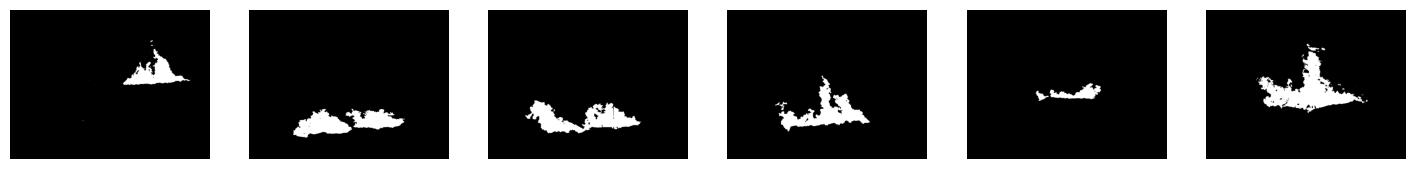

In [25]:
ir_sample = sampling_set[~sampling_set['Infrared'].isna()].sample(n=sample_size)
display_images(ir_sample['Photo'].values)
display_images(ir_sample['Infrared'].values)
display_images(ir_sample['Ground Truth'].values)

In [26]:
ir_sample

Photo           Infrared      Ground Truth Dominant Color  \
345  seq02_rgb_116.png  seq02_nir_116.png  seq02_gt_116.png            red   
517  seq01_rgb_020.png  seq01_nir_020.png  seq01_gt_020.png            red   
511  seq01_rgb_014.png  seq01_nir_014.png  seq01_gt_014.png            red   
500  seq01_rgb_003.png  seq01_nir_003.png  seq01_gt_003.png            red   
1    seq05_rgb_002.png  seq05_nir_002.png  seq05_gt_002.png            red   
474  seq02_rgb_245.png  seq02_nir_245.png  seq02_gt_245.png            red   

     Density  Superposition Rate  Occupancy Rate Smoke Color  Luminosity  
345        0                  45               3         NaN          20  
517        1                  29               5         NaN          39  
511        0                  47               6         NaN          39  
500        0                  31               5         NaN          38  
1          0                  70               1         NaN          41  
474        0                  57               8         NaN          23

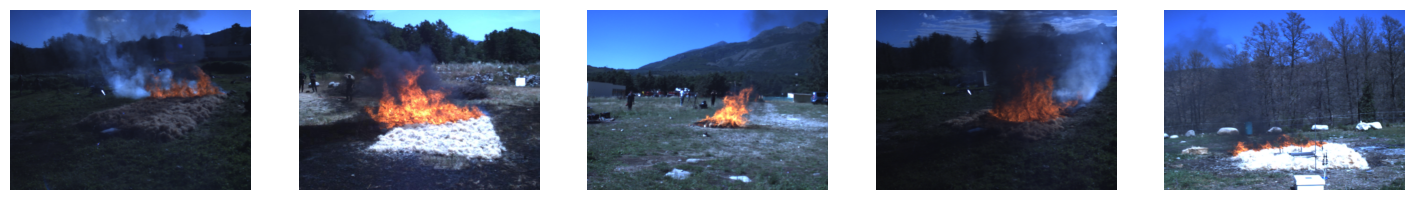

In [28]:
red_fire_sample = sampling_set[sampling_set['Dominant Color'] == 'red'].sample(n=5)
display_images(red_fire_sample['Photo'].values)

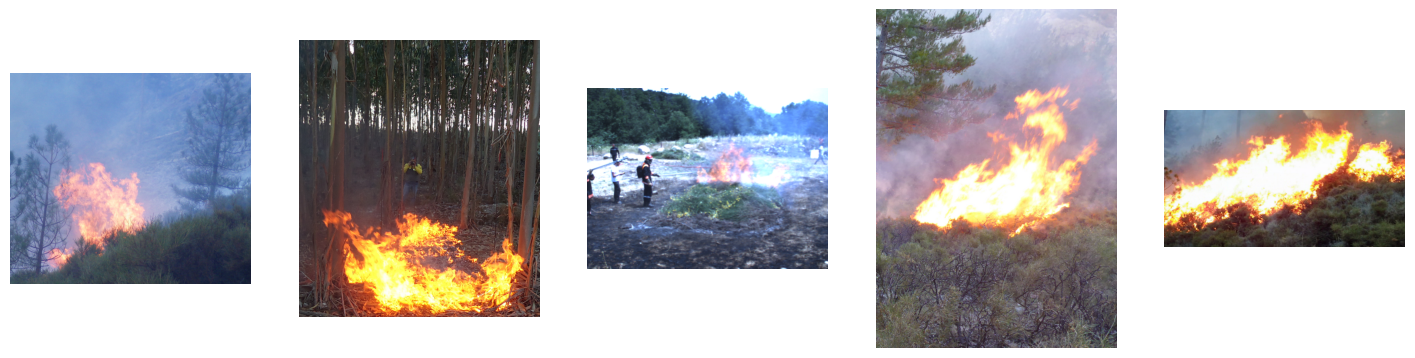

In [30]:
yellow_fire_sample = sampling_set[sampling_set['Dominant Color'] == 'yellow'].sample(n=5)
display_images(yellow_fire_sample['Photo'].values)

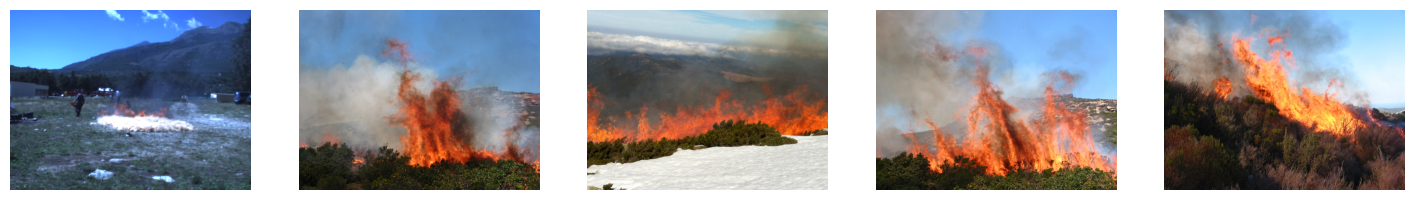

In [ ]:
grey_smoke_sample = sampling_set[sampling_set['Smoke Color'] == 'grey'].sample(n=5)
display_images(grey_smoke_sample['Photo'].values)

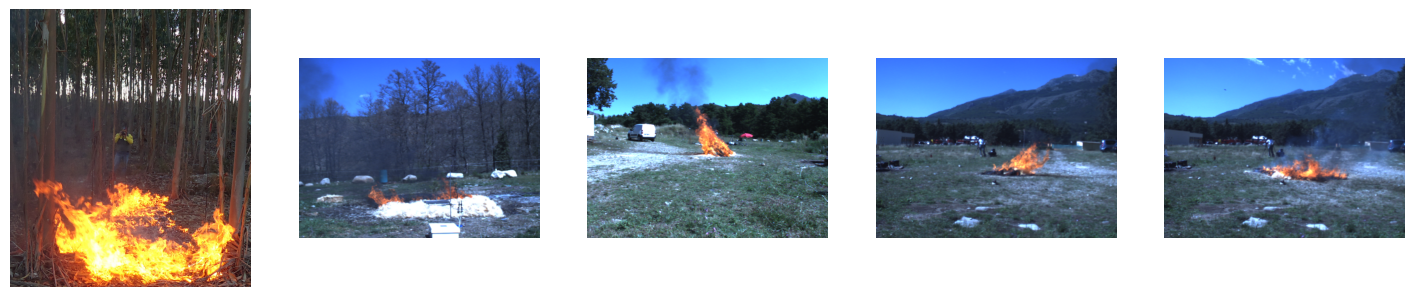

In [ ]:
density_sample = sampling_set[sampling_set['Density'] == 1].sample(n=5)
display_images(density_sample['Photo'].values)

### Findings
*   Not enough labeled samples are available to randomly sample other smoke types for comparison.
*   Based on the fire color samples, the dominant color is based on majority composition which can be subtle based on the size of the fire.
*   Infrared images are homogenous in scene, lighting, and fire color. They show limited variability.
*   Labeled photos appear to have limited vegetation type and terrain which may make it harder for models to generalize. Limited low light conditions are available.
*   Across the entire sample, we see slightly more heterogenity in lighting and terrain than among data labeled with additional fire descriptors although photos are generally taken a safe distance away from the fires. Closer fires may prove more difficult to monitor and classify if trained on this data.






### T-SNE Analysis of Images

In [ ]:
from PIL import ImageOps
from PIL import Image

import torch
import torchvision.transforms as transforms
from torchvision import models

resnet = models.resnet18(pretrained=True)
resnet.eval()

def pad_image(image, target_size=(224, 224)):
    width = image.size[0]
    height = image.size[1]
    padding = (
        (target_size[0] - width) // 2,
        (target_size[1] - height) // 2,
        (target_size[0] - width + 1) // 2,
        (target_size[1] - height + 1) // 2
    )

    padded_image = ImageOps.expand(image, padding, (0, 0, 0))
    return padded_image

# Apply padding and transform to fit ResNet standards
transform = transforms.Compose([
    transforms.Lambda(lambda x: pad_image(x)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def process_image(image_path):
    image = Image.open(data_path + image_path)
    image = transform(image).unsqueeze(0)

    with torch.no_grad():
        features = resnet(image)
    return features.cpu().numpy()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
cv_sample = data[~data['Photo'].str.contains('seq')]

In [ ]:
features_list = []
for image_path in cv_sample['Photo']:
    features = process_image(image_path)
    features_list.append(features.flatten())

features_df = pd.DataFrame(features_list)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


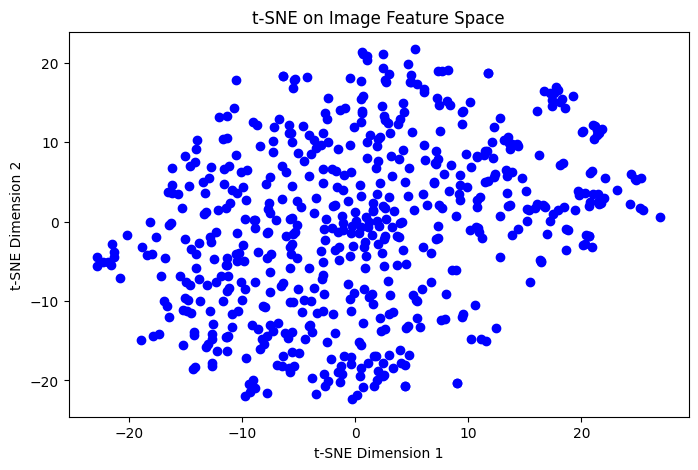

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_result = tsne.fit_transform(scaled_features)

plt.figure(figsize=(8, 5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue', label='Image Features')
plt.title('t-SNE on Image Feature Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

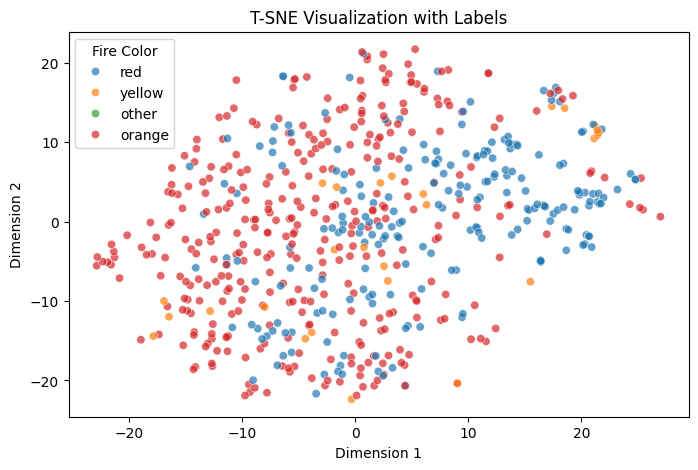

In [ ]:
reduced_features = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
reduced_features['labels'] = cv_sample['Dominant Color'].astype(str).str.strip()

reduced_features = reduced_features.reset_index(drop=True)
cv_sample = cv_sample.reset_index(drop=True)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=reduced_features, x="Dimension 1", y="Dimension 2", hue="labels", palette="tab10", alpha=0.7)

plt.title("T-SNE Visualization with Labels")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Fire Color")
plt.show()